You need to Perform the ETL to extract and transform the necessary data. Check the ReadMe 

In [4]:
import os

if not os.path.exists("../data/top_hits.csv"):
    raise IOError("Perfom the etl script before using this notebook. Check readme.")
else :
    print("Ready to go")

Ready to go


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/top_hits.csv")
df.head()



,year,track_name,album_name,album_release,track_popularity,track_duration_ms,artist_name,artist_followers,artist_popularity,artist_genres
0,2020,Blinding Lights,Blinding Lights,2019-11-29,26,201573,The Weeknd,107168869,97,NaN
1,2020,The Box,Please Excuse Me for Being Antisocial,2019-12-06,85,196652,Roddy Ricch,11548864,78,melodic rap
2,2020,ROXANNE,ROXANNE,2019-10-10,77,163636,Arizona Zervas,795379,63,NaN
3,2020,positions,positions,2020-10-23,2,172324,Ariana Grande,105870217,93,pop
4,2020,Say So,Hot Pink,2019-11-07,79,237893,Doja Cat,33598823,87,NaN


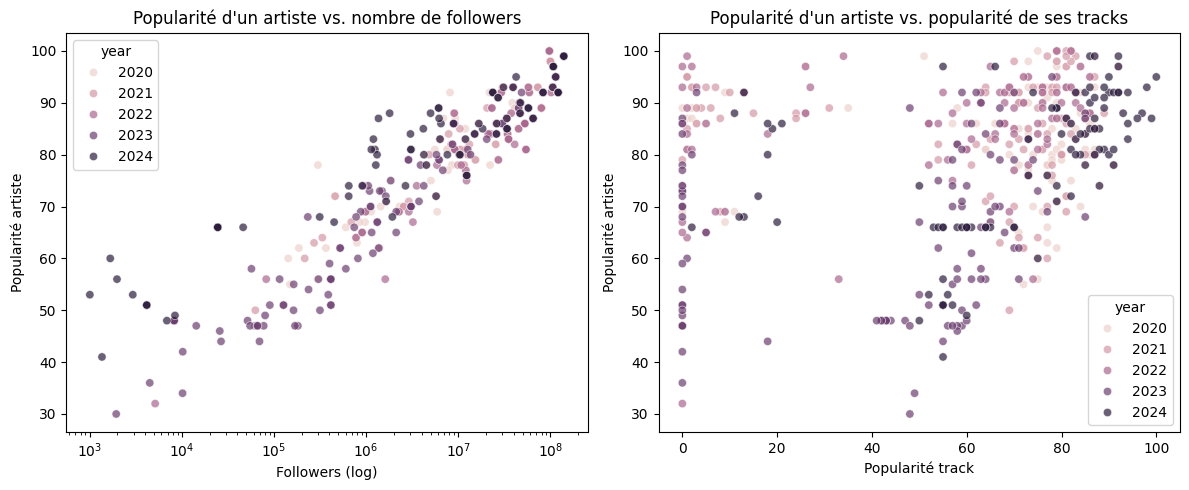

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage : éviter les NaN ou valeurs aberrantes
df_corr = df.dropna(subset=["artist_followers", "artist_popularity", "track_popularity"])
df_corr = df_corr[df_corr["artist_followers"] > 1000]  # éviter les outliers trop petits

plt.figure(figsize=(12, 5))

# Popularité artiste vs. followers
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_corr,
    x="artist_followers",
    y="artist_popularity",
    hue="year",
    alpha=0.7
)
plt.xscale("log")
plt.title("Popularité d'un artiste vs. nombre de followers")
plt.xlabel("Followers (log)")
plt.ylabel("Popularité artiste")

# Popularité artiste vs. track
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_corr,
    x="track_popularity",
    y="artist_popularity",
    hue="year",
    alpha=0.7
)
plt.title("Popularité d'un artiste vs. popularité de ses tracks")
plt.xlabel("Popularité track")
plt.ylabel("Popularité artiste")

plt.tight_layout()
plt.show()


In [8]:
# Attention : artist_genres est une string → il faut l'exploser
df_genres = df.copy()
df_genres["artist_genres"] = df_genres["artist_genres"].str.split(", ")
df_genres = df_genres.explode("artist_genres")

# Comptage par année et genre
top_genres = (
    df_genres.groupby(["year", "artist_genres"])
    .size()
    .reset_index(name="count")
)

# Garder les 5 genres les plus fréquents par an
top5_genres = top_genres.groupby("year").apply(
    lambda x: x.nlargest(5, "count")
).reset_index(drop=True)


/tmp/ipykernel_25/1042069155.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_genres = top_genres.groupby("year").apply(


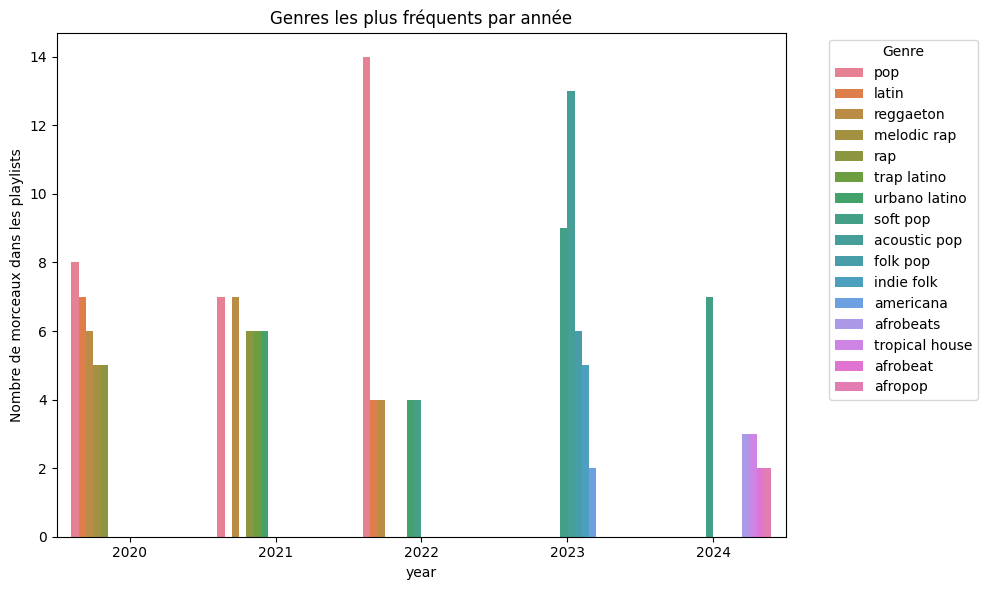

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_genres,
    x="year",
    y="count",
    hue="artist_genres"
)
plt.title("Genres les plus fréquents par année")
plt.ylabel("Nombre de morceaux dans les playlists")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


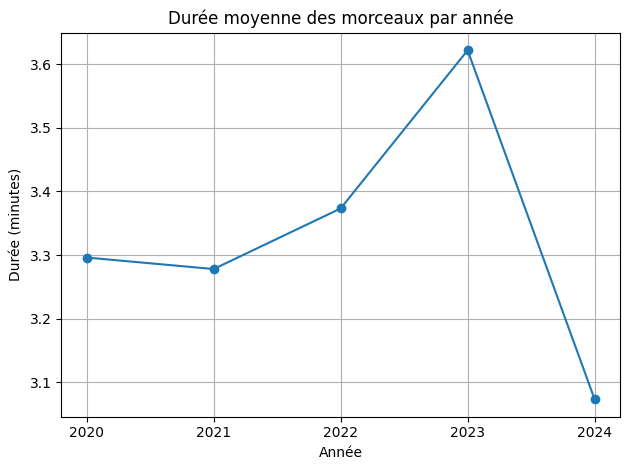

In [8]:
df.groupby("year")["track_duration_min"].mean().plot(marker="o")
plt.title("Durée moyenne des morceaux par année")
plt.xlabel("Année")
plt.ylabel("Durée (minutes)")
plt.xticks(df["year"].unique())  # Affiche les années entières seulement
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
!pip list | grep jupyter
!which jupyter-notebook


jupyter_client            8.6.3
jupyter_core              5.8.1
jupyter-events            0.12.0
jupyter-lsp               2.2.5
jupyter_server            2.16.0
jupyter_server_terminals  0.5.3
jupyterlab                4.4.4
jupyterlab_pygments       0.3.0
jupyterlab_server         2.27.3

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/usr/local/bin/jupyter-notebook


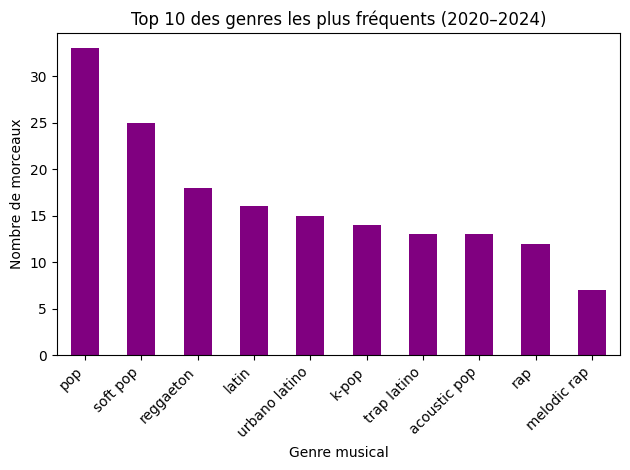

In [13]:
df_genres["artist_genres"].value_counts().nlargest(10).plot(kind="bar", color="purple")
plt.title("Top 10 des genres les plus fréquents (2020–2024)")
plt.ylabel("Nombre de morceaux")
plt.xlabel("Genre musical")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
